In [1]:
import sys
import uproot
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
from processing import counts, kinematics 
from plotting import histos

## Load Events

In [2]:
base_path = "../mg5_data/ctG-sweep/Events/run-ctG-{ctG_val}_decayed_1/tag_1_delphes_events.root"

ctG_vals = [("m5", "-5"), ("m2d5", "-2.5"), ("0", "0"), ("2d5", "2.5"), ("5", "5")]
events = {f"ctg={val}": uproot.open(base_path.format(ctG_val=name))["Delphes"] for name, val in ctG_vals}

## Jets

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 8 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


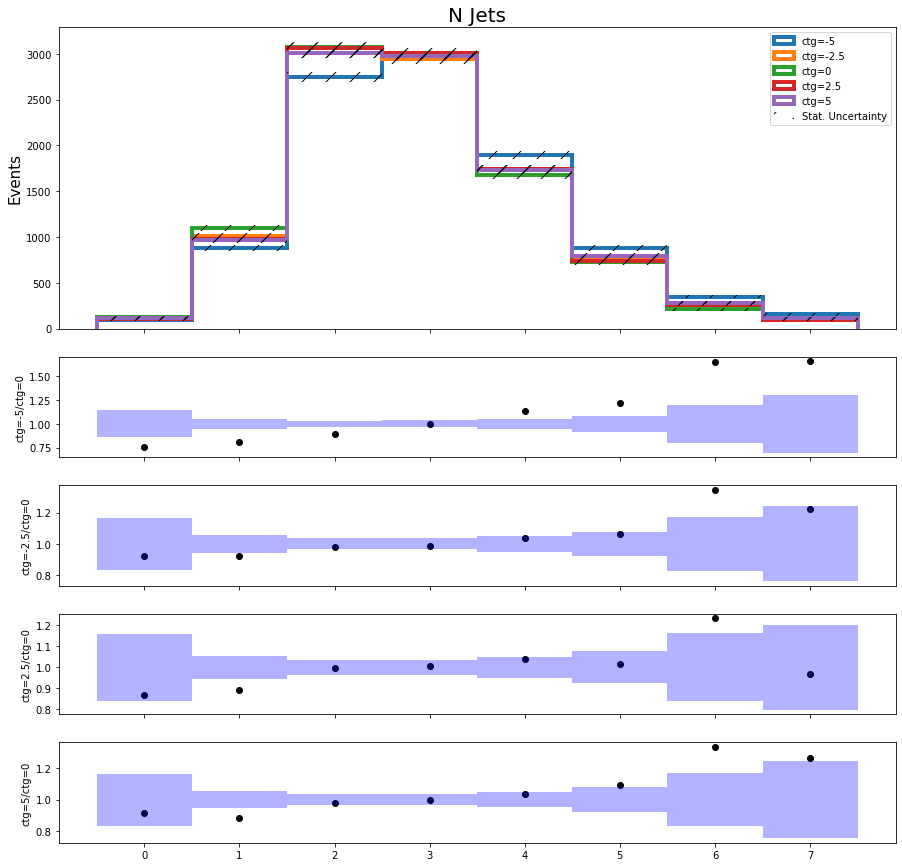

In [3]:
n_jets = {ctg_val: counts.n_particles(ttree, "Jet.BTag") for ctg_val, ttree in events.items()}
histos.ratio_hist(
    processes_q=n_jets.values(),
    hist_labels=n_jets.keys(),
    reference_label="ctg=0",
    n_bins=8,
    hist_range=(0, 8),
    title="N Jets",
    figsize=(15, 15)
)

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 7 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


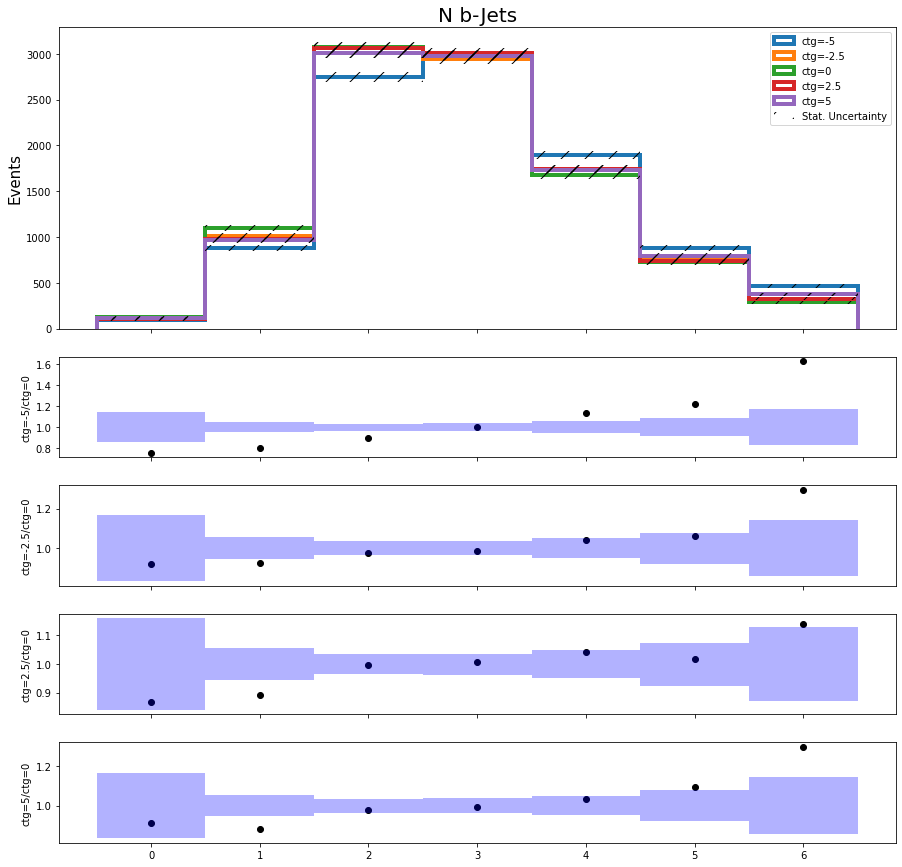

In [4]:
n_bjets = {ctg_val: counts.n_particles_from_tag(ttree, "Jet.BTag") for ctg_val, ttree in events.items()}
histos.ratio_hist(
    processes_q=n_jets.values(),
    hist_labels=n_jets.keys(),
    reference_label="ctg=0",
    n_bins=7,
    hist_range=(0, 7),
    title="N b-Jets",
    figsize=(15, 15)
)

## Leptons

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 3 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


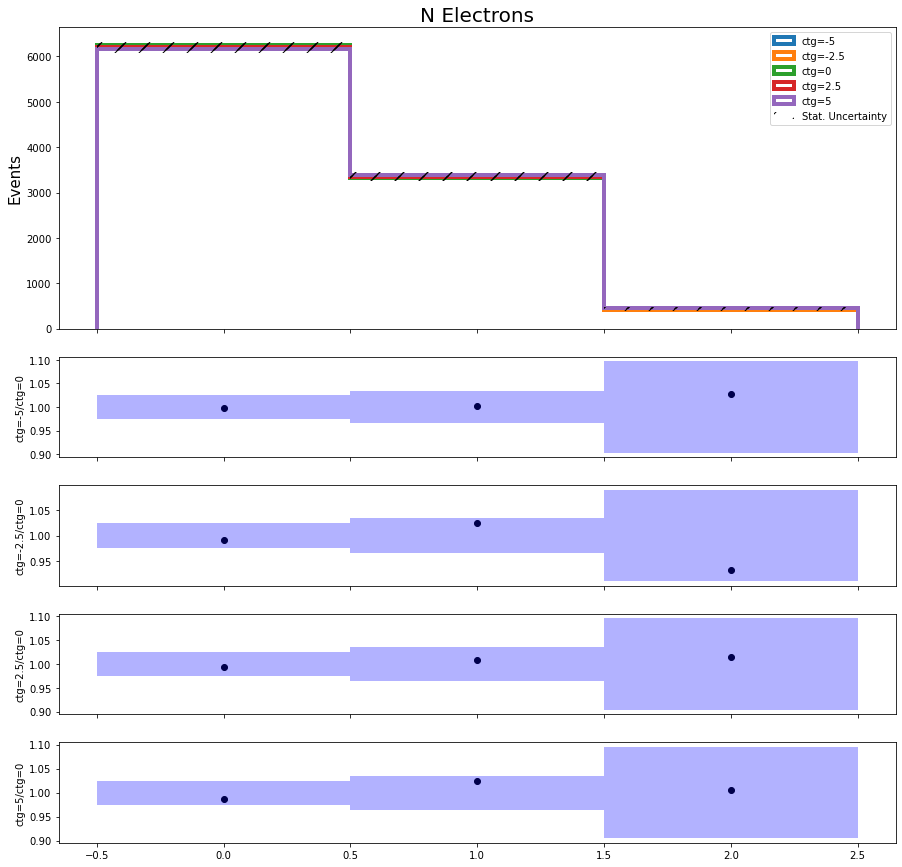

In [5]:
n_elec = {ctg_val: counts.n_particles(ttree, "Electron.PT") for ctg_val, ttree in events.items()}
histos.ratio_hist(
    processes_q=n_elec.values(),
    hist_labels=n_elec.keys(),
    reference_label="ctg=0",
    n_bins=3,
    hist_range=(0, 3),
    title="N Electrons",
    figsize=(15, 15)
)

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 3 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


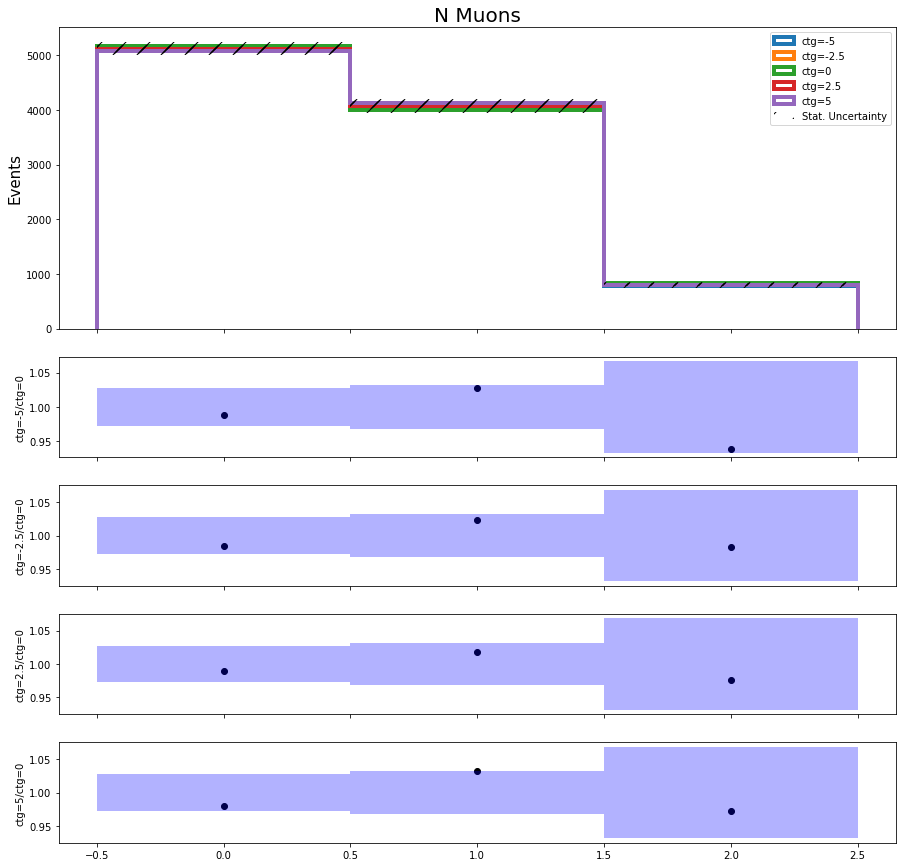

In [6]:
n_muon = {ctg_val: counts.n_particles(ttree, "Muon.PT") for ctg_val, ttree in events.items()}
histos.ratio_hist(
    processes_q=n_muon.values(),
    hist_labels=n_muon.keys(),
    reference_label="ctg=0",
    n_bins=3,
    hist_range=(0, 3),
    title="N Muons",
    figsize=(15, 15)
)

## Di-Lepton System

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 10 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


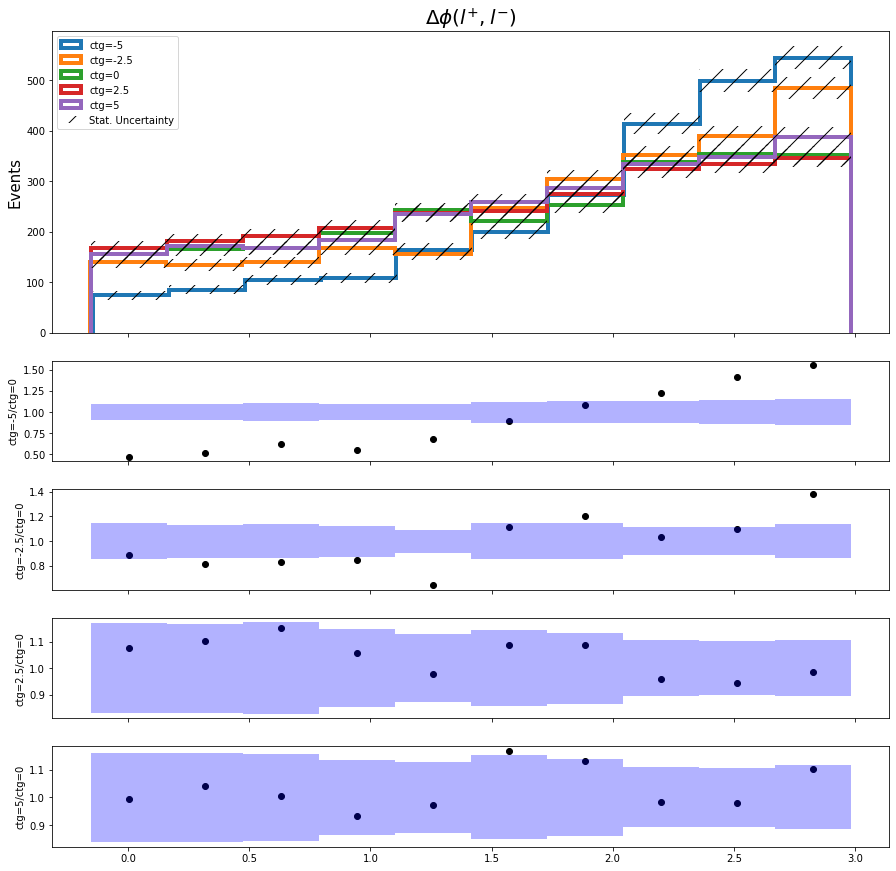

In [7]:
dphi = {ctg_val: kinematics.dphi_dilepton(ttree) for ctg_val, ttree in events.items()}
histos.ratio_hist(
    processes_q=dphi.values(),
    hist_labels=dphi.keys(),
    reference_label="ctg=0",
    n_bins=10,
    hist_range=None,
    title=r"$\Delta \phi(l^{+}, l^{-})$",
    figsize=(15, 15)
)

## $t\bar{t}$  System

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


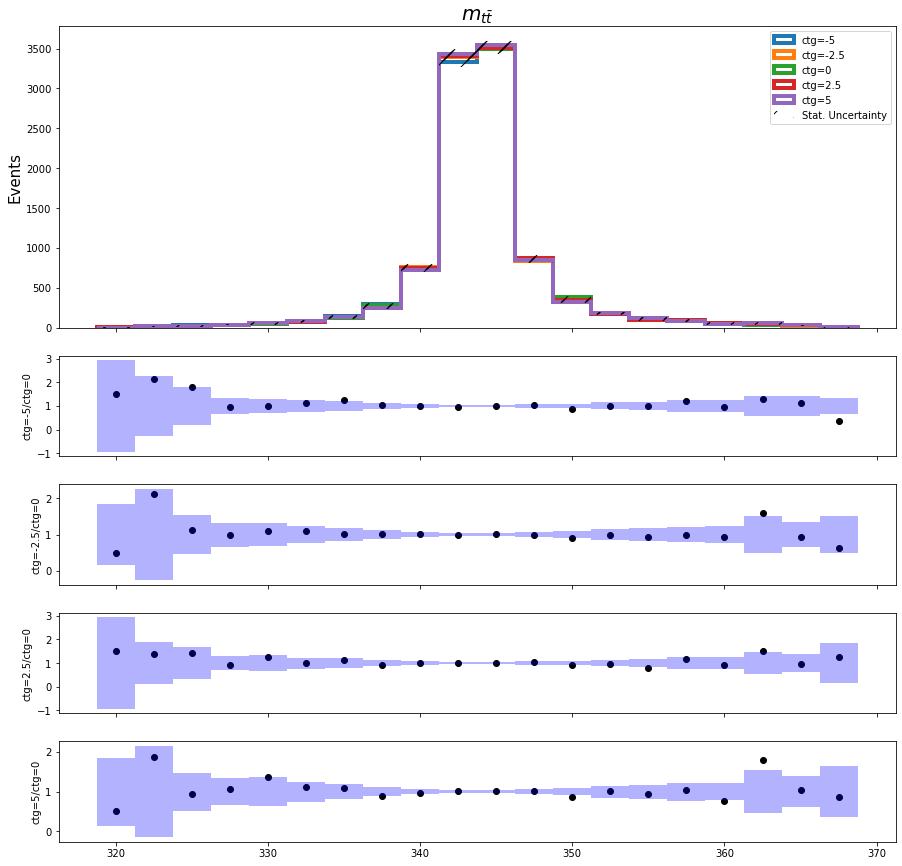

In [8]:
mtt = {ctg_val: kinematics.invariant_mass_ttbar(ttree) for ctg_val, ttree in events.items()}
histos.ratio_hist(
    processes_q=mtt.values(),
    hist_labels=mtt.keys(),
    reference_label="ctg=0",
    n_bins=20,
    hist_range=(320, 370),
    title=r"$m_{t\bar{t}}$",
    figsize=(15, 15)
)

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)


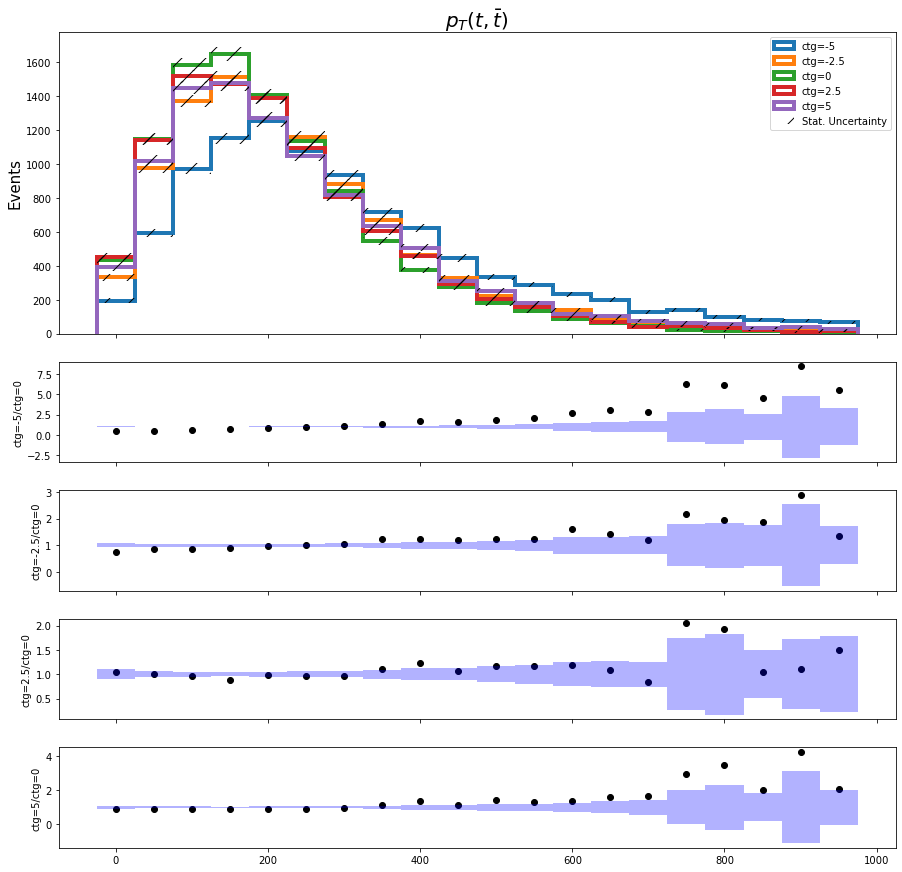

In [9]:
pt = {ctg_val: kinematics.pt_ttbar(ttree) for ctg_val, ttree in events.items()}
histos.ratio_hist(
    processes_q=pt.values(),
    hist_labels=pt.keys(),
    reference_label="ctg=0",
    n_bins=20,
    hist_range=(0, 1000),
    title=r"$p_T(t, \bar{t})$",
    figsize=(15, 15)
)